In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.573971,-0.610543,-1.755836,0.096015,-3.754160,1
1,0.339407,1.555025,-0.385540,-0.691481,0.056705,1
2,1.686237,0.409536,-1.607588,-1.229604,-2.106081,1
3,-0.942748,3.161996,0.426362,-1.815155,2.759562,1
4,1.752364,0.486365,-1.944937,-1.517659,-1.993692,1


In [4]:
# for row sampling

def sample_row(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)


In [5]:
# for column(feature) sampling

import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df


In [6]:
# for combined sampling

def combined_sampling(df, row_percent, col_percent):
  new_df=sample_row(df, row_percent)
  return sample_features(new_df, col_percent)

### using row sampling

In [7]:
df1 = sample_row(df,0.2)


In [8]:
df2 = sample_row(df,0.2)



In [9]:
df3=sample_row(df,0.2)

In [10]:

print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [11]:
df3

,col1,col2,col3,col4,col5,target
8,-1.346644,-1.353437,-1.944285,-0.214074,-0.908289,0
4,1.752364,0.486365,-1.944937,-1.517659,-1.993692,1
1,0.339407,1.555025,-0.385540,-0.691481,0.056705,1
56,-1.157597,2.476228,2.367625,-2.262394,1.260085,1
44,-0.868424,-0.186299,-3.227431,-0.613977,-0.374719,0
4,1.752364,0.486365,-1.944937,-1.517659,-1.993692,1
23,1.295944,1.174176,-2.018370,-1.264684,-0.751116,1
56,-1.157597,2.476228,2.367625,-2.262394,1.260085,1
41,-3.991047,-2.314300,-1.875558,0.152990,1.161144,0
2,1.686237,0.409536,-1.607588,-1.229604,-2.106081,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:


from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[0] <= 0.364\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.7, 'x[4] <= -0.498\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3, 0.5, 'x[1] <= 0.026\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.7, 'x[3] <= -0.174\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.7, 0.5, 'x[4] <= -0.89\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.6, 0.3, 'x[2] <= -2.992\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

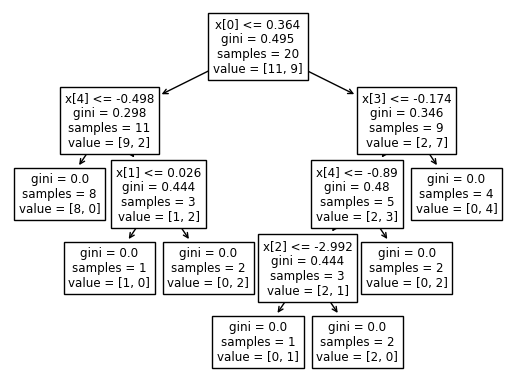

In [15]:


plot_tree(clf1)

[Text(0.5, 0.875, 'x[0] <= -0.405\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.625, 'x[1] <= 2.164\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'x[0] <= 0.954\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.625, 0.375, 'x[4] <= -0.758\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

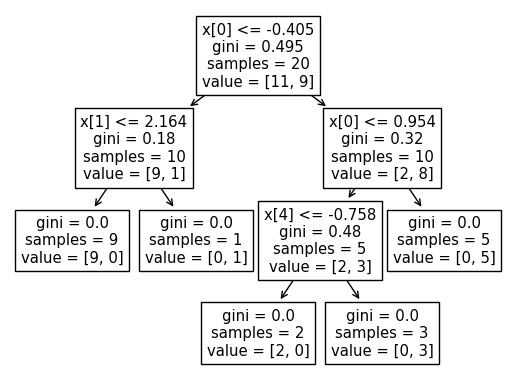

In [16]:

plot_tree(clf2)

[Text(0.3333333333333333, 0.875, 'x[3] <= -0.653\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.5, 0.625, 'x[0] <= -0.534\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6666666666666666, 0.375, 'x[4] <= -0.216\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

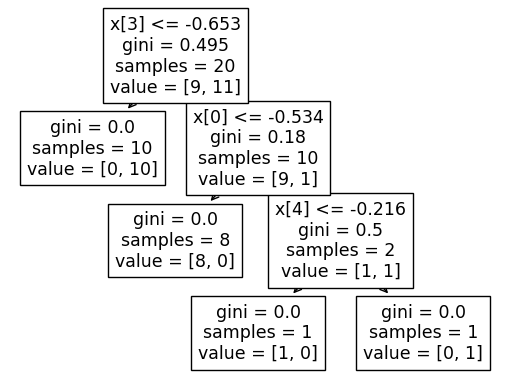

In [17]:


plot_tree(clf3)

In [18]:

clf1.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [19]:
clf2.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
clf3.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## using feature sampling

In [21]:
df4=sample_features(df, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [22]:
df5=sample_features(df, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [23]:
df6=sample_features(df, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
print(df4.columns)
print(df5.columns)
print(df6.columns)

Index(['col4', 'col5', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [25]:
df5

,col4,col3,target
0,0.096015,-1.755836,1
1,-0.691481,-0.385540,1
2,-1.229604,-1.607588,1
3,-1.815155,0.426362,1
4,-1.517659,-1.944937,1
...,...,...,...
95,-2.471858,-1.673323,1
96,0.681798,-1.168394,0
97,-1.223190,0.292658,1
98,1.496649,0.127240,0


In [26]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [27]:
clf4.fit(df4.iloc[:, 0:2], df4.iloc[:, -1])
clf5.fit(df5.iloc[:, 0:2], df5.iloc[:, -1])
clf6.fit(df6.iloc[:, 0:2], df6.iloc[:, -1])

DecisionTreeClassifier()

In [28]:


from sklearn.tree import plot_tree

[Text(0.5568181818181818, 0.9444444444444444, 'x[0] <= 0.125\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3409090909090909, 0.8333333333333334, 'x[0] <= -1.263\ngini = 0.341\nsamples = 55\nvalue = [12, 43]'),
 Text(0.29545454545454547, 0.7222222222222222, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.38636363636363635, 0.7222222222222222, 'x[1] <= -0.371\ngini = 0.444\nsamples = 36\nvalue = [12, 24]'),
 Text(0.22727272727272727, 0.6111111111111112, 'x[1] <= -2.726\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2727272727272727, 0.5, 'x[0] <= -0.509\ngini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.18181818181818182, 0.3888888888888889, 'x[0] <= -0.606\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.13636363636363635, 0.2777777777777778, 'x[0] <= -1.211\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.09090909090909091, 0.16666666666666666, 'x[1] <= -2.199\ngini = 0.444

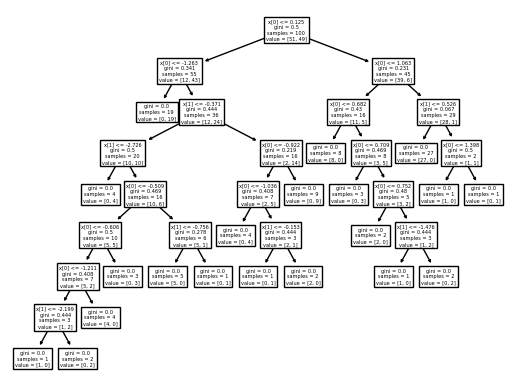

In [29]:

plot_tree(clf4)

[Text(0.5595238095238095, 0.9285714285714286, 'x[0] <= 0.125\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.30952380952380953, 0.7857142857142857, 'x[1] <= -2.226\ngini = 0.341\nsamples = 55\nvalue = [12, 43]'),
 Text(0.14285714285714285, 0.6428571428571429, 'x[1] <= -2.572\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.09523809523809523, 0.5, 'x[1] <= -3.419\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[0] <= -0.689\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.09523809523809523, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.21428571428571427, 'x[1] <= -3.179\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23809523809523808, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = 

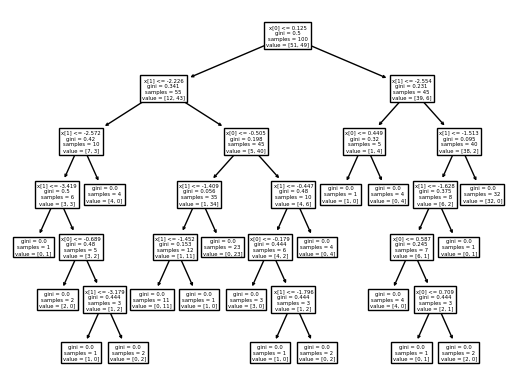

In [30]:

plot_tree(clf5)

[Text(0.47058823529411764, 0.9375, 'x[0] <= -0.51\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.23529411764705882, 0.8125, 'x[1] <= 2.132\ngini = 0.24\nsamples = 43\nvalue = [37, 6]'),
 Text(0.17647058823529413, 0.6875, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.29411764705882354, 0.6875, 'x[1] <= 3.934\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.23529411764705882, 0.5625, 'x[1] <= 2.844\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.17647058823529413, 0.4375, 'x[1] <= 2.492\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.11764705882352941, 0.3125, 'x[0] <= -1.314\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.058823529411764705, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23529411764705882, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.29411764705882354, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.35294117647058

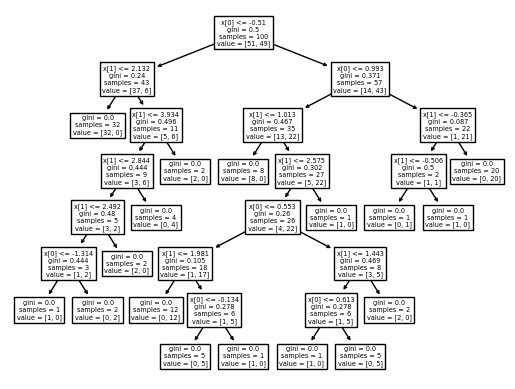

In [31]:

plot_tree(clf6)

In [32]:
clf4.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
clf5.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
clf6.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## using combined

In [35]:
df7=combined_sampling(df, 0.5, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df8=combined_sampling(df, 0.5, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
df9=combined_sampling(df, 0.5, 0.5)

C:\Users\khadk\AppData\Local\Temp\ipykernel_2620\3594395006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [38]:
print(df7.columns)
print(df8.columns)
print(df9.columns)

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [39]:
df7

,col3,col1,target
5,0.294293,-0.750966,0
79,-1.446153,0.794726,0
36,0.226328,-0.411984,1
67,-1.664196,-1.162218,0
87,0.009865,-2.168995,0
30,-1.853598,-0.646735,1
53,-2.379205,-1.232096,0
50,-0.392192,0.433065,1
97,0.292658,-0.290425,1
43,-1.580909,2.182036,1


In [40]:


from sklearn.tree import DecisionTreeClassifier
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [41]:
clf7.fit(df7.iloc[:, 0:2], df7.iloc[:, -1])
clf8.fit(df8.iloc[:, 0:2], df8.iloc[:, -1])
clf9.fit(df9.iloc[:, 0:2], df9.iloc[:, -1])

DecisionTreeClassifier()

In [42]:
from sklearn.tree import plot_tree

[Text(0.4264705882352941, 0.9285714285714286, 'x[1] <= -0.659\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.11764705882352941, 0.7857142857142857, 'x[1] <= -2.264\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.058823529411764705, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.17647058823529413, 0.6428571428571429, 'x[1] <= -1.205\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.23529411764705882, 0.5, 'x[1] <= -1.17\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.17647058823529413, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.29411764705882354, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7352941176470589, 0.7857142857142857, 'x[1] <= 1.599\ngini = 0.391\nsamples = 30\nvalue = [8, 22]'),
 Text(0.6764705882352942, 0.6428571428571429, 'x[1] <= 0.745\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Tex

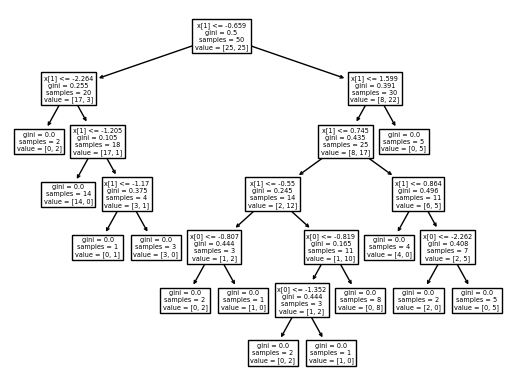

In [43]:
plot_tree(clf7)

[Text(0.5, 0.9375, 'x[0] <= -1.048\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.2727272727272727, 0.8125, 'x[1] <= -2.226\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.18181818181818182, 0.6875, 'x[1] <= -2.744\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.09090909090909091, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.6875, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7272727272727273, 0.8125, 'x[0] <= 1.004\ngini = 0.382\nsamples = 35\nvalue = [26, 9]'),
 Text(0.6363636363636364, 0.6875, 'x[1] <= -1.354\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.45454545454545453, 0.5625, 'x[0] <= -0.739\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.36363636363636365, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8181818181818182, 0.5625, 'x

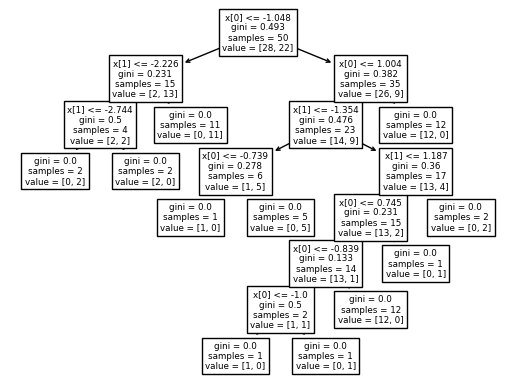

In [44]:
plot_tree(clf8)

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.711\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.25, 0.75, 'x[0] <= 2.778\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.75, 'x[1] <= 0.896\ngini = 0.355\nsamples = 26\nvalue = [6, 20]'),
 Text(0.625, 0.5833333333333334, 'x[0] <= -0.347\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= -0.891\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.25, 'x[0] <= -0.803\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.4166666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.875, 0.58333333333

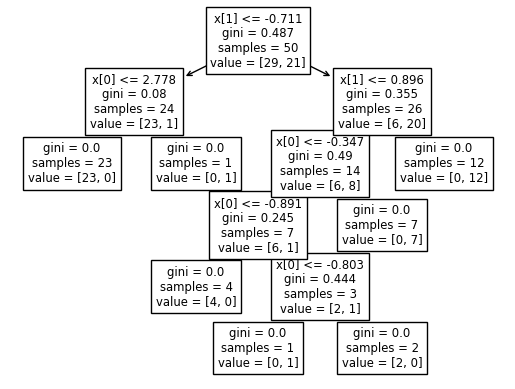

In [45]:
plot_tree(clf9)

In [46]:
clf7.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [47]:
clf8.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [48]:
clf9.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])